# Novo Bolsa Família (Janeiro de 2024)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [91]:
df = pd.read_csv('./202401_NovoBolsaFamilia.csv', encoding='latin-1', delimiter=';')
df['NOME FAVORECIDO'] = "Anônimo"
df['CPF FAVORECIDO'] = "***-***-***-**"
df['NIS FAVORECIDO'] = "***********"
df.head()

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,202401,202303,AC,139,RIO BRANCO,***-***-***-**,***********,Anônimo,"800,00"
1,202401,202303,BA,3329,ANGUERA,***-***-***-**,***********,Anônimo,"750,00"
2,202401,202303,BA,3731,MONTE SANTO,***-***-***-**,***********,Anônimo,"650,00"
3,202401,202303,BA,3761,NOVA VICOSA,***-***-***-**,***********,Anônimo,"650,00"
4,202401,202303,BA,3849,SALVADOR,***-***-***-**,***********,Anônimo,"850,00"


In [92]:
df.describe()

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,CÓDIGO MUNICÍPIO SIAFI
count,20833379.0,2.083338e+07,2.083338e+07
mean,202401.0,2.024002e+05,3.887407e+03
std,0.0,8.271424e+00,2.802435e+03
min,202401.0,2.023030e+05,1.000000e+00
25%,202401.0,2.024010e+05,1.389000e+03
50%,202401.0,2.024010e+05,3.413000e+03
75%,202401.0,2.024010e+05,6.001000e+03
max,202401.0,2.024010e+05,9.997000e+03


In [93]:
# verificando valores ausentes
print(df.isnull().sum())

# convertendo colunas de data para o formato datetime
df['MÊS COMPETÊNCIA'] = pd.to_datetime(df['MÊS COMPETÊNCIA'], format='%Y%m')
df['MÊS REFERÊNCIA'] = pd.to_datetime(df['MÊS REFERÊNCIA'], format='%Y%m')

# convertendo 'VALOR PARCELA' para float
df['VALOR PARCELA'] = df['VALOR PARCELA'].str.replace(',', '.').astype(float)

# verificando o tipo de cada coluna
print(df.dtypes)

MÊS COMPETÊNCIA           0
MÊS REFERÊNCIA            0
UF                        0
CÓDIGO MUNICÍPIO SIAFI    0
NOME MUNICÍPIO            0
CPF FAVORECIDO            0
NIS FAVORECIDO            0
NOME FAVORECIDO           0
VALOR PARCELA             0
dtype: int64
MÊS COMPETÊNCIA           datetime64[ns]
MÊS REFERÊNCIA            datetime64[ns]
UF                                object
CÓDIGO MUNICÍPIO SIAFI             int64
NOME MUNICÍPIO                    object
CPF FAVORECIDO                    object
NIS FAVORECIDO                    object
NOME FAVORECIDO                   object
VALOR PARCELA                    float64
dtype: object


In [94]:
df.head()

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,2024-01-01,2023-03-01,AC,139,RIO BRANCO,***-***-***-**,***********,Anônimo,800.0
1,2024-01-01,2023-03-01,BA,3329,ANGUERA,***-***-***-**,***********,Anônimo,750.0
2,2024-01-01,2023-03-01,BA,3731,MONTE SANTO,***-***-***-**,***********,Anônimo,650.0
3,2024-01-01,2023-03-01,BA,3761,NOVA VICOSA,***-***-***-**,***********,Anônimo,650.0
4,2024-01-01,2023-03-01,BA,3849,SALVADOR,***-***-***-**,***********,Anônimo,850.0


In [95]:
numero_beneficiarios_por_municipio = df.groupby('NOME MUNICÍPIO').size()
print(numero_beneficiarios_por_municipio)

# dados para o município de João Pessoa/PB
beneficiarios_joao_pessoa = df.loc[df['CÓDIGO MUNICÍPIO SIAFI'] == 2051]
numero_beneficiarios_joao_pessoa = beneficiarios_joao_pessoa.shape[0]
print(f"Número de beneficiários em João Pessoa: {numero_beneficiarios_joao_pessoa}")

# dados para o município de Angicos/RN
beneficiarios_angicos = df.loc[df['CÓDIGO MUNICÍPIO SIAFI'] == 1615]
numero_beneficiarios_angicos = beneficiarios_angicos.shape[0]
print(f"Número de beneficiários em Angicos: {numero_beneficiarios_angicos}")

NOME MUNICÍPIO
ABADIA DE GOIAS         1900
ABADIA DOS DOURADOS      436
ABADIANIA               1457
ABAETE                  1623
ABAETETUBA             40383
                       ...  
XIQUE-XIQUE            11981
ZABELE                   449
ZACARIAS                 148
ZE DOCA                 7623
ZORTEA                   108
Length: 5291, dtype: int64
Número de beneficiários em João Pessoa: 87211
Número de beneficiários em Angicos: 1793


In [96]:
maior_parcela = df['VALOR PARCELA'].max()
menor_parcela = df['VALOR PARCELA'].min()

print(f"A maior parcela é: R${maior_parcela:.2f}")
print(f"A menor parcela é: R${menor_parcela:.2f}")

A maior parcela é: R$4664.00
A menor parcela é: R$25.00


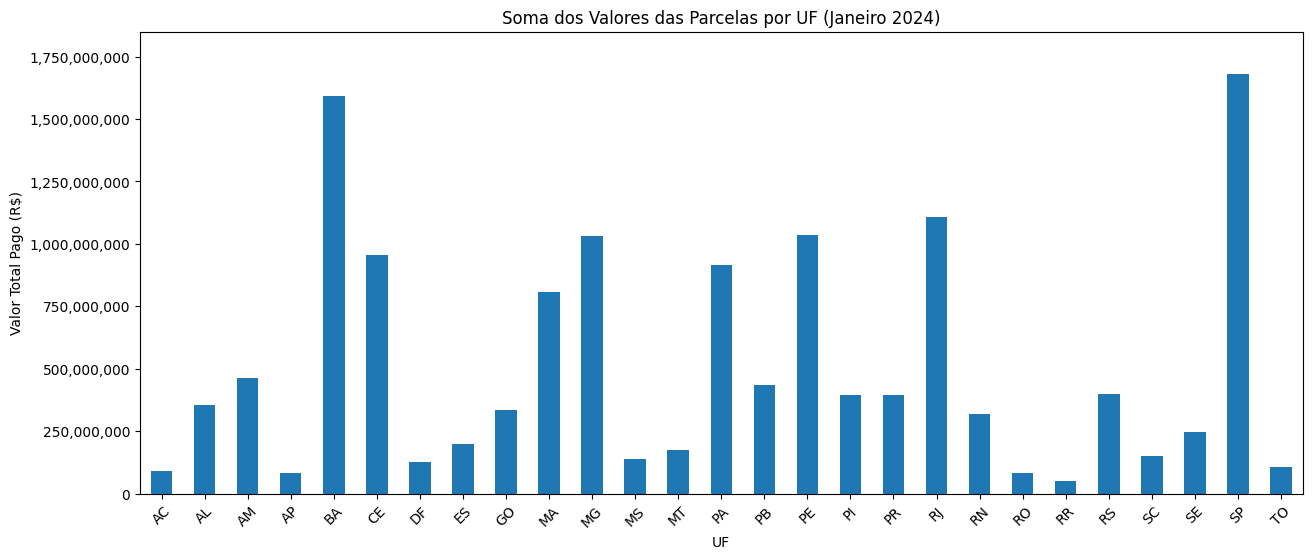

In [97]:
valor_por_uf = df.groupby('UF')['VALOR PARCELA'].sum()

plt.figure(figsize=(15,6))
ax = valor_por_uf.plot(kind='bar')
plt.title('Soma dos Valores das Parcelas por UF (Janeiro 2024)')
plt.xlabel('UF')
plt.ylabel('Valor Total Pago (R$)')

ax.set_ylim(0, valor_por_uf.max() * 1.1)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()


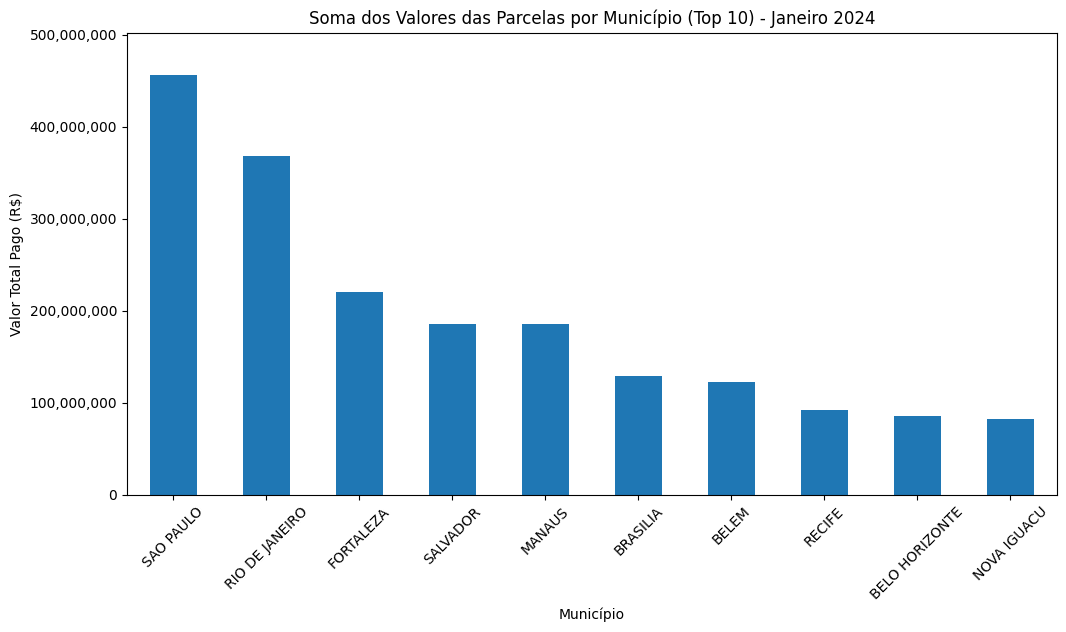

In [98]:
valor_por_municipio = df.groupby('NOME MUNICÍPIO')['VALOR PARCELA'].sum()

plt.figure(figsize=(12,6))
ax = valor_por_municipio.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Soma dos Valores das Parcelas por Município (Top 10) - Janeiro 2024')
plt.xlabel('Município')
plt.ylabel('Valor Total Pago (R$)')

ax.set_ylim(0, valor_por_municipio.max() * 1.1)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()